<a href="https://colab.research.google.com/github/martasannzz/hola_mundo/blob/main/class/CNN/Classical_Architectures_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Classical_Architectures_CNN.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Classical_Architectures_CNN.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

**Classic network architectures:**

- LeNet-5
- AlexNet
- VGG 16

**Modern network architectures:**

- Inception
- ResNet
- ResNeXt
- DenseNet



# AlexNet

ESTA SE PUEDE DECIR QUE ES LA PRIMERA RED QUE REVOLUCIONÓ LAS REDES CONVOLUCIONALES

AlexNet is the name of CNN, designed by  [Alex Krizhevsky](https://www.cs.toronto.edu/~kriz/) . AlexNet is considered one of the most influential papers published in computer vision, as of 2020, the paper has been cited over 70,000 times according to Google Scholar.

AlexNet competed in the [ImageNet](https://en.wikipedia.org/wiki/ImageNet) Large Scale Visual Recognition Challenge (1000 different classes) on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up.

AlexNet consists of 5 Convolutional Layers and 3 Fully Connected Layers.


<img src="https://i.ibb.co/CBp6sfy/Alex-Net-architecture.png" alt="Alex-Net-architecture" border="0" />

In [1]:
img_shape = (227, 227, 3)
n_classes = 1000

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

alexnet = tf.keras.Sequential() # DEFINIMOS MODELO VACÍO Y CARGAMOS LAS CAPAS

# VAMOS AÑADIENDO LAS CONVOLUCIONES HASTA 5 CONVOLUCIONES. LUEGO PONEMOS LA CAPA FULLY CONNECTED. LUEGO DEPENDIENDO DEL NUMERO DE CLASES PONEMOS LA ULTIMA

# Layer 1
alexnet.add(Conv2D(filters=96, kernel_size=(11, 11), input_shape=img_shape))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 2
alexnet.add(Conv2D(filters=256, kernel_size=(5, 5)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 3
alexnet.add(Conv2D(filters=384, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4
alexnet.add(Conv2D(filters=384, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(Conv2D(filters=256, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

## Fully-connected
# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes, activation='softmax'))

alexnet.summary()

# VEMOS QUE TIENE 129489960 PARÁMETROS

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 217, 217, 96)   │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 217, 217, 96)   │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 217, 217, 96)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 108, 108, 96)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 104, 104, 256)  │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 104, 104, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 104, 104, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 52, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50, 50, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 23, 23, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   104,861,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 129,492,712 (493.98 MB)

 Trainable params: 129,489,960 (493.96 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(alexnet, show_shapes=True)

In [ ]:
def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

# LeNet-5

ESTA CAPA ES PARA RECONOCER DÍGITOS

LeNet-5 is a classical CNN that was introduced back to 1998, is designed to recognize the digits from 0 to 9.

LeNet-5 is such a classical model that it consists of two convolution layers followed by average pooling layers for each and apply three fully connected layers in the end of the network. In the original paper **sigmoid** activation function was used.


<img src="https://i.ibb.co/y4KJH39/LeNet-5.png" alt="LeNet-5" border="0">

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


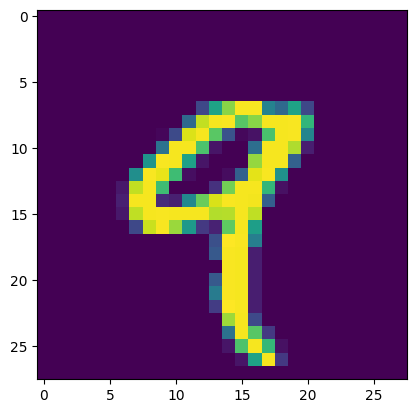

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model / data parameters
num_classes = 10
img_shape = (28, 28, 1)

# load data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(train_labels, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

plt.imshow(train_images[4])
plt.show()

### Create the model: EJERCICIO

Model original architecture:

- **First conv layer**: 6 filters of 3x3, sigmoid activation + Average Pooling
- **Second conv layer**: 16 filters of 3x3, sigmoid activation + Average Pooling
- **Flatten layer**
- **Dense layer**: 120 units, sigmoid activation
- **Dense layer**: 84 units, sigmoid activation
- **Output layer**: 10 units (classes), softmax activation

In [ ]:
## sigmoids and layers.AveragePooling2D
from tensorflow.keras import layers

model_old = keras.Sequential()

model_old.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='sigmoid', input_shape=img_shape))
model_old.add(...)

model_old.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model_old.fit(x_train, y_train, batch_size=32 ,epochs=5, validation_split=0.2, verbose=1)

In [ ]:
results = model_old.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
import pandas as pd
show_loss_accuracy_evolution(history)

In [ ]:
def show_errors(x_test, model, y_test, n_samples=10):
    labels = y_test.argmax(axis=-1).astype(np.int32)
    predictions = model.predict(x_test)
    preds = predictions.argmax(axis=-1).astype(np.int32)
    preds_prob = predictions.max(axis=-1)

    bad_pred_inds = np.where(preds != labels)[0]
    n_samples = min(len(bad_pred_inds), n_samples)
    samples_inds = np.random.choice(bad_pred_inds, n_samples)
    for ind in samples_inds:
        title = 'Predicted : {0}, real : {1}, prob: {2:.2f}'.format(
            int(preds[ind]), labels[ind], preds_prob[ind])
        plt.imshow(x_test[ind, :, :, 0])
        plt.title(title)
        plt.show()
        print()
    return


show_errors(x_test, model_old, y_test, n_samples=10)

### Improve the model

- **First conv layer**: 6 filters of 3x3, relu activation + Max Pooling
- **Second conv layer**: 16 filters of 3x3, relu activation + Max Pooling
- **Flatten layer**
- **Dense layer**: 120 units, relu activation
- **Dense layer**: 84 units, relu activation
- **Output layer**: 10 units (classes), softmax activation
Use relu instead sigmoids and MaxPooling2D, try any regularization

In [ ]:
## relu and layers.MaxPooling2D

model = keras.Sequential()

model.add(...)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, batch_size=128 ,epochs=5, validation_split=0.2, verbose=1)

In [ ]:
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
import pandas as pd
show_loss_accuracy_evolution(history)

In [ ]:
show_errors(x_test, model, y_test, n_samples=10)

#### Take a photo and predict


In [ ]:
def read_image(image_path, target_size=None, grayscale=False):
    image = tf.keras.preprocessing.image.load_img(image_path,
                                                  target_size=target_size,
                                                  grayscale=grayscale)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image


#img_path = '../images/digit.png'
url = 'https://i.ibb.co/3h7mLN1/digit.png'
image_path = tf.keras.utils.get_file("digit_8.png", url)
img = read_image(image_path, target_size=(28, 28), grayscale=True)

plt.imshow(np.squeeze(np.squeeze(img))) # en google colap hay que poner np.squeeze para verlo
plt.show()

In [ ]:
x = np.expand_dims(img, 0)
x = x / 255.0
print(x.shape)
print('Old model character: {0} with probability: {1}'.format(model_old.predict(x).argmax(), model_old.predict(x).max()))
print('Improved model character: {0} with probability: {1}'.format(model.predict(x).argmax(), model.predict(x).max()))

# VGG-16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s

<img src="https://i.ibb.co/QYfBNKm/vgg-16.png" alt="vgg-16" border="0">

In [5]:
model_VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    classes=1000,
    input_shape=(256, 256, 3),
)
model_VGG16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# summarize filter shapes
for i, layer in enumerate(model_VGG16.layers): # iteramos asi para ver las features que aprende en cada capa
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights() # podemos coger los filtros y los bias de cada capa
    print(i, layer.name, filters.shape)

NameError: name 'model_VGG16' is not defined

In [ ]:
img_folder = '../../images'
url = 'https://i.ibb.co/q5TFmqh/bird.jpg'
#url = 'https://i.ibb.co/vd1SqSM/The-grandeur-of-the-Taj-Mahal-and-its-intricate-stone-inlays-immediately-greets-the-visitor-upon-ent.jpg'
image_path = tf.keras.utils.get_file("bird.jpg", url)
# image_path = '../../images/bird.jpeg'
image = read_image(image_path, target_size=(256, 256))
img = np.expand_dims(image, axis=0)
plt.imshow(image, cmap='viridis')

In [ ]:
from tensorflow.keras.models import Model

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = {layer.name: layer.output for layer in model_VGG16.layers}
# PARA ACCEDER A LAS CAPAS INTERMEDIAS HAY QUE CARGAR UN DICCIONARIO QUE VAYA RECORRIENDO POR CADA NOMBRE (LAS KEY SON LOS NOMBRES) Y LA SALIDA DE LA CAPA PARA LUEGO PODER ACCEDER
# EN CADA LAYER SE PUEDE VER LA ENTRADA Y LA SALIDA

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model_VGG16.inputs,
                                outputs=outputs_dict)
# VAMOS A CREAR UN MODELO DE LA FORMA FUNCIONAL QUE CON LAS ENTRADAS DEL MODELO (model_VGG16.inputs) QUE SON LAS IMAGENES EN CADA CASO, VAMOS A GENERAR EL DICCIONARIO DE SALIDA
# EL DICCIONARIO DE SALIDA VA A SER NOMBRE Y LA SALIDA DE CADA CAPA PARA PODER ACCEDER A CADA CAPA.

In [ ]:
## Get the features of the image
features = feature_extractor(img) # DEFINIMOS EL MODELO CON LA IMAGEN Y LUEGO VEMOS EL NUEVO MODELO QUE VA A SER FEATURES
print(features.keys()) # VA A TENER COMO KEYS EL NOMBRE DE TODAS LAS CAPAS DEL MODELO.
#print(list(features.items())[0])
# SI QUISIERAMOS HACER EL PLOT DE LA SLAIDA DE UNA DETERMINADA CAPA HABRIA QUE HACER features y el nombre de la capa:

In [ ]:
# get feature map for first hidden layer
feature_maps = features['block1_conv1'] # entonces si nos queremos ir a la primera capa feature_maps TIENE TODAS LAS SALIDAS DE ESA CAPA
print('feature_maps first hidden layer shape: ', feature_maps.shape)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(30, 30))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in viridis or gray
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
        ix += 1
# show the figure
plt.show() # A CONTINUACION VEMOS TODO LO QUE HA APRENDIDO ESA CAPA

In [ ]:
# block3_conv3
feature_maps = features['block3_conv3']
print('feature_maps shape: ', feature_maps.shape)

# plot all 256 maps in an 16x16 squares
square = 16
ix = 1
plt.figure(figsize=(40, 40))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [ ]:
features.keys()

In [ ]:
feature_maps = features['block1_conv2']
print('feature_maps shape: ', feature_maps.shape)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()

In [ ]:
feature_maps = features['block1_pool']
print('feature_maps shape: ', feature_maps.shape)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()

DE ESTA FORMA PODEMOS VER QUE HAY DESPUES DE CADA CAPA DE LA RED